<a href="https://colab.research.google.com/github/thamyrissacamoto/MarvelAPI/blob/Thamyris%2FconsumindoAPI/cleaning_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import sqlite3
import ast
import matplotlib.pyplot as plt


In [ ]:
characters = pd.read_csv('characters_raw.csv')

In [70]:
characters.columns

Index(['id', 'name', 'description', 'modified', 'resourceURI', 'urls',
       'thumbnail.path', 'thumbnail.extension', 'comics.available',
       'comics.collectionURI', 'comics.items', 'comics.returned',
       'series.available', 'series.collectionURI', 'series.items',
       'series.returned', 'stories.available', 'stories.collectionURI',
       'stories.items', 'stories.returned', 'events.available',
       'events.collectionURI', 'events.items', 'events.returned'],
      dtype='object')

In [177]:
df_characters = characters[[
    'id', 'name', 'description', 'modified', 'comics.available',
    'comics.items', 'series.available', 'series.items', 'stories.available',
    'stories.items', 'events.available', 'events.items'
]].copy()

In [178]:
def parse(x):
    if x == x:
        return ast.literal_eval(x)
    return []

cols = ["comics", "series", "stories", "events"]

for c in cols:
    col_origem = f"{c}.items"
    col_destino = f"{c}_list"
    df_characters[col_destino] = df_characters[col_origem].apply(parse)

In [180]:
df_characters.drop(columns=["comics.items", "series.items", "stories.items", "events.items"], inplace=True)

In [181]:
df_characters.rename(columns={
    'comics.available': 'num_comics',
    'series.available': 'num_series',
    'stories.available': 'num_stories',
    'events.available': 'num_events',
}, inplace=True)


In [245]:
df_characters.drop(columns=["comics_list", "series_list", "stories_list", "events_list"]).duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
1559,False
1560,False
1561,False
1562,False


In [182]:
df_characters['modified'] = pd.to_datetime(df_characters['modified'])

In [183]:
df_characters.dtypes

,0
id,int64
name,object
description,object
modified,"datetime64[ns, UTC]"
num_comics,int64
num_series,int64
num_stories,int64
num_events,int64
comics_list,object
series_list,object


In [83]:
df_characters.head(2)

,id,name,description,modified,num_comics,num_series,num_stories,num_events,comics_list,series_list,stories_list,events_list
0,1011334,3-D Man,NaN,2014-04-29 14:18:17+00:00,12,3,21,1,[{'resourceURI': 'https://gateway.marvel.com/v...,[{'resourceURI': 'https://gateway.marvel.com/v...,[{'resourceURI': 'https://gateway.marvel.com/v...,[{'resourceURI': 'https://gateway.marvel.com/v...
1,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18 15:54:04+00:00,4,2,7,0,[{'resourceURI': 'https://gateway.marvel.com/v...,[{'resourceURI': 'https://gateway.marvel.com/v...,[{'resourceURI': 'https://gateway.marvel.com/v...,[]


In [84]:
df_characters.describe()

,id,num_comics,num_series,num_stories,num_events
count,1.564000e+03,1564.000000,1564.000000,1564.000000,1564.000000
mean,1.011027e+06,65.117647,21.175831,82.120844,1.787724
std,2.025418e+03,243.803016,67.932697,342.945204,4.215828
min,1.009144e+06,0.000000,0.000000,0.000000,0.000000
25%,1.009566e+06,2.000000,1.000000,2.000000,0.000000
50%,1.010844e+06,12.000000,5.000000,14.000000,0.000000
75%,1.011238e+06,41.000000,17.000000,48.250000,2.000000
max,1.017858e+06,4540.000000,1223.000000,6596.000000,44.000000


In [132]:
df_characters.isnull().sum()

,0
id,0
name,0
description,1257
modified,0
num_comics,0
num_series,0
num_stories,0
num_events,0
comics_list,0
series_list,0


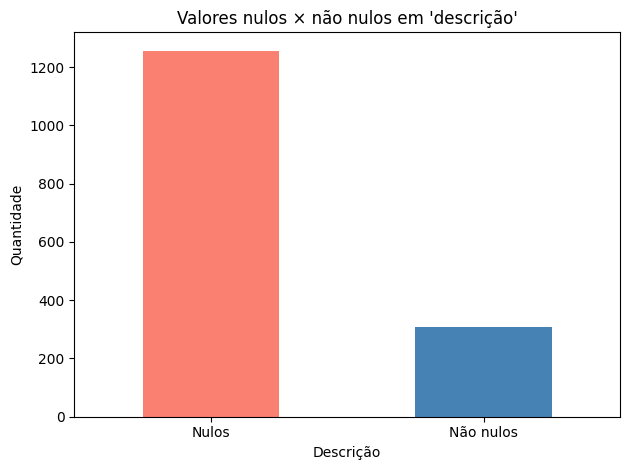

In [240]:
col = "description"
counts = df_characters[col].isna().value_counts().rename({True: "Nulos", False: "Não nulos"})

counts.plot(kind="bar", color=["salmon", "steelblue"])
plt.title(f"Valores nulos × não nulos em 'descrição'")
plt.ylabel("Quantidade")
plt.xlabel("Descrição")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

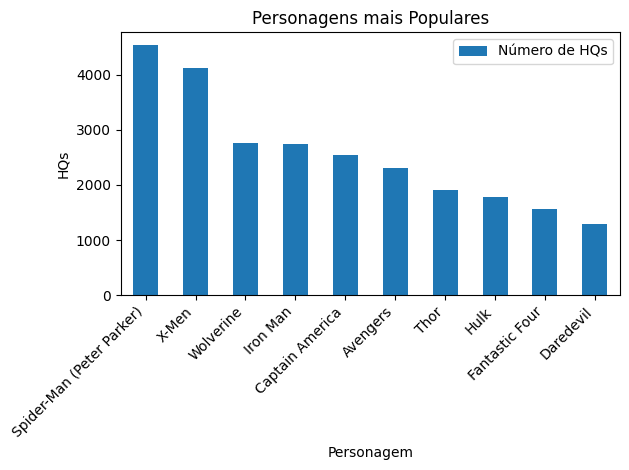

In [242]:
df_top_comics = df_characters[["name", "num_comics"]].sort_values(by="num_comics", ascending=False).head(10)

df_top_comics.plot(x='name', y='num_comics', kind='bar', title='Personagens mais Populares')
plt.legend(["Número de HQs"])
plt.xlabel('Personagem')
plt.ylabel('HQs');
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

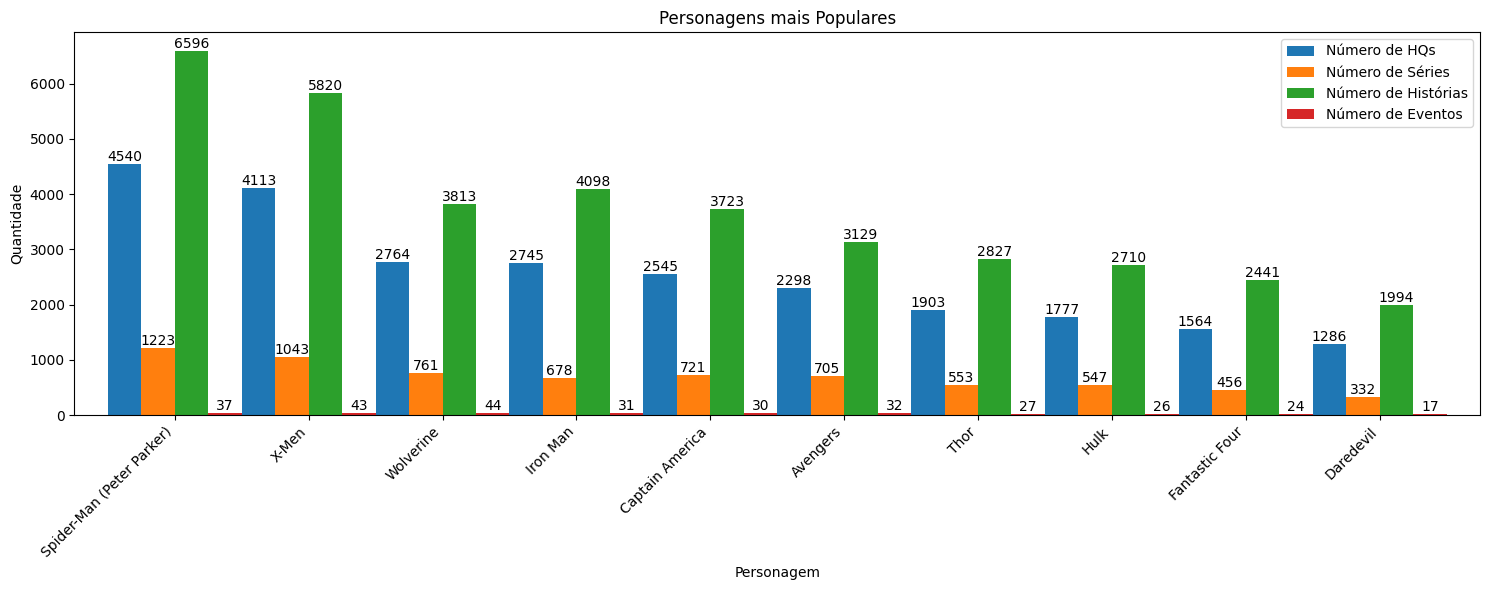

In [243]:
from pathlib import WindowsPath
cols = ["num_comics", "num_series", "num_stories", "num_events"]
df_top = df_characters[["name"] + cols].sort_values(by="num_comics", ascending=False).head(10)

ax = df_top.set_index("name")[cols].plot(kind="bar", figsize=(15,6), width=1)
plt.title("Personagens mais Populares")
plt.ylabel("Quantidade")
plt.xlabel("Personagem")
plt.legend(["Número de HQs", "Número de Séries", "Número de Histórias", "Número de Eventos"])
plt.xticks(rotation=45, ha="right")

for barra in ax.patches:
    altura = barra.get_height()
    x = barra.get_x() + barra.get_width() / 2
    y = altura
    ax.text(x, y, str(int(altura)), ha='center', va='bottom')

plt.tight_layout()
plt.show()